# Семинар 7

##  Сдвиги для ускорения методов вычисления собственных значений

## Степенной метод: напоминание

- Задача поиска максимального по модулю собственного значения
- Сходимость линейная, коэффициент $\frac{|\lambda_2|}{|\lambda_1|}$
- Может не сходиться. В каком случае?
- Сложность пропорциональна сложности умножения матрицы на вектор

## Сдвиги для ускорения сходимости степенного метода

- Метод обратной итерации со сдвигами

\begin{align*}
& x_{k+1} = (A - \sigma I)^{-1} x_k\\
& x_{k+1} := \frac{x_{k+1}}{\|x_{k+1}\|}
\end{align*}

- Куда сойдётся?

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.linalg as splin

def shift_inverse_iteration(A, x0, num_iter, shift=0.):
    x = x0.copy()
    conv = [x]
    for i in range(num_iter):
        x = np.linalg.solve(A - shift * np.eye(n), x)
        x = x / np.linalg.norm(x)
        conv.append(x)
    return x, conv

def shift_inverse_iteration_fast(A, x0, num_iter, shift=0.):
    x = x0.copy()
    conv = [x]
    lu_factor = splin.lu_factor(A - shift * np.eye(n))
    for i in range(num_iter):
        x = splin.lu_solve(lu_factor, x)
        x = x / np.linalg.norm(x)
        conv.append(x)
    return x, conv

In [6]:
n = 10
A = np.random.randn(n, n)
A = A.T @ A + np.eye(n)
# A = A + A.T
true_spectrum = np.linalg.eigvals(A)
print(np.sort(true_spectrum))
x0 = np.random.randn(n)
num_iter = 40

[ 1.09858752  1.54131488  3.96384717  5.36111159  7.7924315   9.14735987
 11.06975054 14.57843833 20.64134629 27.95647162]


In [11]:
# smallest_eigv, conv_sm = shift_inverse_iteration(A, x0, num_iter)
# print(smallest_eigv @ A @ smallest_eigv)
# smallest_eigv, conv_sm = shift_inverse_iteration_fast(A, x0, num_iter)
# print(smallest_eigv @ A @ smallest_eigv)

%timeit shift_inverse_iteration(A, x0, num_iter)
%timeit shift_inverse_iteration_fast(A, x0, num_iter)

1.08 ms ± 26.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
712 µs ± 8.35 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


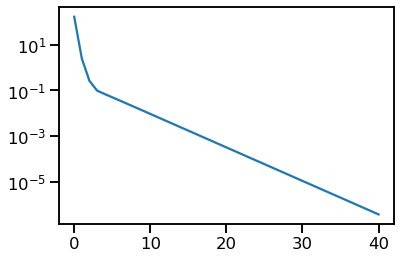

In [10]:
plt.semilogy([np.linalg.norm(A @ x - (x @ A @ x) * x) for x in conv_sm])

In [14]:
shift = 3.5
middle_eigv, conv_m = shift_inverse_iteration(A, x0, num_iter, shift)
print(middle_eigv @ A @ middle_eigv)

3.963847169411486


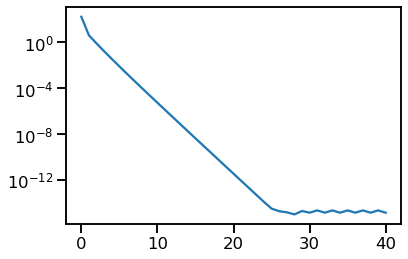

In [15]:
plt.semilogy([np.linalg.norm(A @ x - (x @ A @ x) * x) for x in conv_m])

In [31]:
shift = 3.5
large_eigv, conv_l = shift_inverse_iteration(A, x0, num_iter, shift)
print(large_eigv @ A @ large_eigv)

3.963847169411486


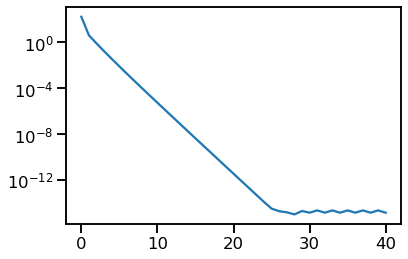

In [32]:
res = np.array([np.linalg.norm(A @ x - (x @ A @ x) * x) for x in conv_l])
plt.semilogy(res)

## Метод Релея

- Адаптивный сдвиг на каждой итерации

$$ \sigma_k = \frac{(Ax_k, x_k)}{(x_k, x_k)} $$

In [27]:
def rayleigh_quotient_iteration(A, x0, num_iter, shift):
    x = x0.copy()
    x = x / np.linalg.norm(x)
    conv = [x]
    
    for i in range(3):
        x = np.linalg.solve(A - shift * np.eye(n), x)
        x = x / np.linalg.norm(x)
        conv.append(x)
        
    for i in range(num_iter):
        lam = x @ A @ x
        x = np.linalg.solve(A - lam * np.eye(n), x)
        x = x / np.linalg.norm(x)
        conv.append(x)
    return x, conv

In [33]:
eigv_rq, conv_rq = rayleigh_quotient_iteration(A, x0, num_iter, 3.5)

In [34]:
print(eigv_rq @ A @ eigv_rq)
print(np.sort(np.linalg.eigvals(A)))
print(x0)

3.9638471694114843
[ 1.09858752  1.54131488  3.96384717  5.36111159  7.7924315   9.14735987
 11.06975054 14.57843833 20.64134629 27.95647162]
[ 0.17442873  0.88777797 -0.27331819 -1.31931679  0.28867975 -0.77379147
 -0.52759933  1.29583252 -0.57559836 -0.71427372]


[7.02389224e+00 4.08161227e+00 7.98454137e-01 1.67428273e-01
 5.59471291e-04 1.22478130e-11 1.53134330e-15 3.25166963e-15
 1.64415184e-15 1.23784889e-15 2.05990506e-15 1.64415184e-15
 1.23784889e-15 2.05990506e-15 1.64415184e-15 1.23784889e-15
 2.05990506e-15 1.64415184e-15 1.23784889e-15 2.05990506e-15
 1.64415184e-15 1.23784889e-15 2.05990506e-15 1.64415184e-15
 1.23784889e-15 2.05990506e-15 1.64415184e-15 1.23784889e-15
 2.05990506e-15 1.64415184e-15 1.23784889e-15 2.05990506e-15
 1.64415184e-15 1.23784889e-15 2.05990506e-15 1.64415184e-15
 1.23784889e-15 2.05990506e-15 1.64415184e-15 1.23784889e-15
 2.05990506e-15 1.64415184e-15 1.23784889e-15 2.05990506e-15]


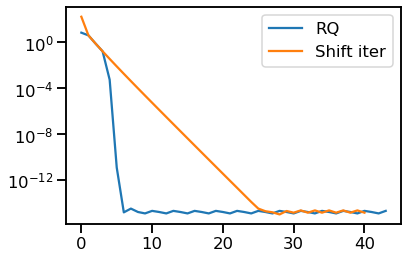

In [35]:
res = np.array([np.linalg.norm(A @ x - (x @ A @ x) * x) for x in conv_rq])
plt.semilogy(res, label="RQ")
plt.semilogy([np.linalg.norm(A @ x - (x @ A @ x) * x) for x in conv_l], label="Shift iter")
plt.legend()
print(res)

## Как найти другие собственные значения?



In [36]:
B = A - eigv_rq @ (A @ eigv_rq) * np.outer(eigv_rq, eigv_rq)
print(np.sort(np.linalg.eigvals(B)))

[-3.87532365e-15  1.09858752e+00  1.54131488e+00  5.36111159e+00
  7.79243150e+00  9.14735987e+00  1.10697505e+01  1.45784383e+01
  2.06413463e+01  2.79564716e+01]


In [37]:
eigv_rq_B, conv_rq_B = rayleigh_quotient_iteration(B, x0, num_iter, 3.5)
print(eigv_rq_B @ B @ eigv_rq_B)

1.5413148787575306


In [38]:
C = B - eigv_rq_B @ (A @ eigv_rq_B) * np.outer(eigv_rq_B, eigv_rq_B)
print(np.sort(np.linalg.eigvals(C)))

[4.51611674e-16 1.44648977e-15 1.09858752e+00 5.36111159e+00
 7.79243150e+00 9.14735987e+00 1.10697505e+01 1.45784383e+01
 2.06413463e+01 2.79564716e+01]


In [40]:
eigv_rq_C, conv_rq_C = rayleigh_quotient_iteration(C, x0, num_iter, 1)
print(eigv_rq_C @ C @ eigv_rq_C)

1.0985875209751008


### И так далее для других собственных векторов....

- Какая правильная стратегия использования метода Релея?

## Матричные функции: введение


$$ B = f(A) = \sum_{k=0}^{\infty} c_k A^k$$

- Это не поэлементная функция
- Нужно уметь вычислять ряд
- Устойчивость

## Вычисление степени матрицы

- Дана матрица $A$
- Нужно вычислить $A^k$
- Это необходимо при вычисление матричных функций, которые представляются в виде матричного ряда

### Используем спектральное разложение

- $A = U\Lambda U^{-1}$
- Тогда $A^k = U \Lambda^k U^{-1}$

### Матричная экспонента: знакомство или напоминание

$$\exp(A) = \sum_{k=0}^{\infty} \frac{A^k}{k!} $$

- Про матричные функции будет отдельное занятие!
- Важно! Чаще нужно не само значение матричной экспоненты, а результат её умножения на некоторый вектор $v$: 

$$ \exp(A)v $$

- Это позволяет разработать быстрые методы для вычисления произведения, не считая саму матричную экспоненту!

In [1]:
import numpy as np
import scipy.linalg as splin
import matplotlib.pyplot as plt
plt.rc("text", usetex=True)
%matplotlib inline 

n = 7
A = np.random.randn(n, n)
A = A + A.T
print(np.linalg.norm(A))
expA = splin.expm(A)
print(expA.round(4))

8.438876407718288
[[187.7476  87.9555  48.13   -44.105   31.9807 -17.2936 -50.1404]
 [ 87.9555  42.7119  18.1747 -17.471   15.937   -5.7288 -22.7997]
 [ 48.13    18.1747  81.9481 -68.8222  11.3873 -22.2447 -15.8679]
 [-44.105  -17.471  -68.8222  58.5962 -10.8772  18.3027  13.7764]
 [ 31.9807  15.937   11.3873 -10.8772   7.1901  -2.1719  -8.1713]
 [-17.2936  -5.7288 -22.2447  18.3027  -2.1719   8.1892   5.6451]
 [-50.1404 -22.7997 -15.8679  13.7764  -8.1713   5.6451  14.2386]]


In [2]:
def qr_algorithm(A, num_iter, eps):
    T = A.copy()
    U = np.eye(A.shape[0])
    conv = [(T, U)]
    for i in range(num_iter):
        Q, R = np.linalg.qr(T)
        T = R @ Q
        U = U @ Q
        conv.append((T, U))
        if np.sum(np.abs(np.tril(T, k=-1))) < eps:
            break
    return T, U, conv[1:]

In [3]:
T, U, conv = qr_algorithm(A, 2000, 1e-6)
print(np.linalg.norm(A - U @ T @ U.T))

6.237266322060142e-14


In [4]:
cur_term = np.eye(n)
expA_approx = np.eye(n)
K = 50
denom = 1.
conv = [expA_approx]
for i in range(1, K):
    denom = denom * i
    cur_term = U @ T**i @ U.T / denom
    expA_approx = expA_approx + cur_term
    conv.append(expA_approx)
print(expA_approx.round(4))
print(np.linalg.norm(expA_approx - expA))

[[187.7476  87.9555  48.13   -44.105   31.9807 -17.2936 -50.1404]
 [ 87.9555  42.712   18.1747 -17.471   15.937   -5.7288 -22.7997]
 [ 48.13    18.1747  81.9481 -68.8222  11.3873 -22.2447 -15.8679]
 [-44.105  -17.471  -68.8222  58.5962 -10.8772  18.3027  13.7764]
 [ 31.9807  15.937   11.3873 -10.8772   7.1901  -2.1719  -8.1713]
 [-17.2936  -5.7288 -22.2447  18.3027  -2.1719   8.1892   5.6451]
 [-50.1404 -22.7997 -15.8679  13.7764  -8.1713   5.6451  14.2386]]
3.8841001662222175e-05


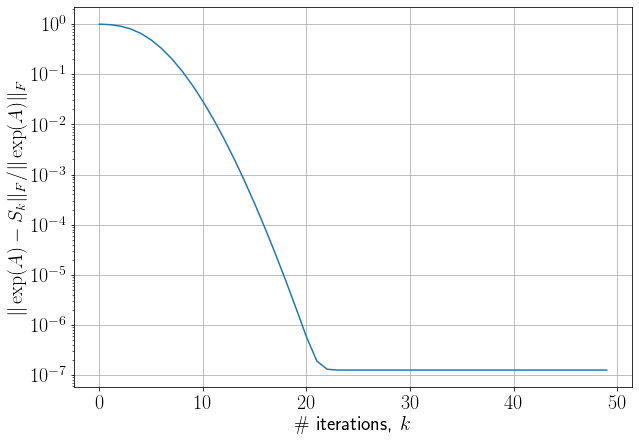

In [5]:
plt.figure(figsize=(10, 7))
plt.plot([np.linalg.norm(expA - approx, "fro") / np.linalg.norm(expA) for approx in conv])
plt.yscale("log")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("\# iterations, $k$", fontsize=20)
plt.ylabel("$\|\exp(A) - S_k \|_F / \|\exp(A)\|_F$", fontsize=20)
plt.grid(True)

## Главное по семинару

- Сдвиги и ускорение методов поиска собственных значений
- Метод Релея
- Матричные функции для плотных матриц